<a href="https://colab.research.google.com/github/my-quach/R-AI/blob/main/2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import skfuzzy as fuzz
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [9]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.4 MB/s eta 0:00:00


In [18]:
# Tạo các biến đầu vào
blood_sugar = ctrl.Antecedent(np.arange(50, 251.1, 0.1), 'blood_sugar')
bmi = ctrl.Antecedent(np.arange(10, 41.1, 0.1), 'bmi')
urination = ctrl.Antecedent(np.arange(0, 11.1, 0.1), 'urination')
fatigue = ctrl.Antecedent(np.arange(0, 11.1, 0.1), 'fatigue')

# Tạo biến đầu ra
diabetes_risk = ctrl.Consequent(np.arange(0, 101.1, 0.1), 'diabetes_risk')

# Hàm thành viên cho mức đường huyết
blood_sugar['low'] = fuzz.trimf(blood_sugar.universe, [50, 65, 80])
blood_sugar['normal'] = fuzz.trimf(blood_sugar.universe, [80, 100,120])
blood_sugar['high'] = fuzz.trimf(blood_sugar.universe, [120, 160, 200])
blood_sugar['very_high'] = fuzz.trimf(blood_sugar.universe, [180, 220, 250])

# Hàm thành viên cho BMI
bmi['underweight'] = fuzz.trimf(bmi.universe, [10, 15, 18.5])
bmi['normal'] = fuzz.trimf(bmi.universe, [18.5, 21, 24.9])
bmi['overweight'] = fuzz.trimf(bmi.universe, [25, 27, 29.9])
bmi['obese'] = fuzz.trimf(bmi.universe, [30, 35, 40])

# Hàm thành viên cho tần suất đi tiểu
urination['rare'] = fuzz.trimf(urination.universe, [0, 2, 4])
urination['sometimes'] = fuzz.trimf(urination.universe, [3, 5, 7])
urination['often'] = fuzz.trimf(urination.universe, [6, 8, 10])

# Hàm thành viên cho mức độ mệt mỏi
fatigue['low'] = fuzz.trimf(fatigue.universe, [0, 2, 4])
fatigue['moderate'] = fuzz.trimf(fatigue.universe, [3, 5, 7])
fatigue['high'] = fuzz.trimf(fatigue.universe, [6, 8, 10])

# Hàm thành viên cho nguy cơ tiểu đường
diabetes_risk['LR'] = fuzz.trimf(diabetes_risk.universe, [0, 20, 40])
diabetes_risk['MR'] = fuzz.trimf(diabetes_risk.universe, [30, 50, 70])
diabetes_risk['HR'] = fuzz.trimf(diabetes_risk.universe, [60, 80, 100])
diabetes_risk['VHR'] = fuzz.trimf(diabetes_risk.universe, [90, 110, 130])

# Tạo các quy tắc mờ
rules = [
    ctrl.Rule(blood_sugar['very_high'] & urination['often'], diabetes_risk['VHR']),
    ctrl.Rule(blood_sugar['very_high'] & urination['sometimes'], diabetes_risk['HR']),
    ctrl.Rule(blood_sugar['high'] & urination['often'], diabetes_risk['HR']),
    ctrl.Rule(blood_sugar['normal'] & urination['rare'], diabetes_risk['LR']),

    ctrl.Rule(blood_sugar['very_high'] & bmi['obese'], diabetes_risk['VHR']),
    ctrl.Rule(blood_sugar['very_high'] & bmi['overweight'], diabetes_risk['HR']),
    ctrl.Rule(blood_sugar['high'] & bmi['overweight'], diabetes_risk['HR']),
    ctrl.Rule(blood_sugar['high'] & bmi['overweight'], diabetes_risk['MR']),
    ctrl.Rule(blood_sugar['normal'] & bmi['normal'], diabetes_risk['LR']),

    ctrl.Rule(blood_sugar['very_high'] & fatigue['high'], diabetes_risk['VHR']),
     ctrl.Rule(blood_sugar['high'] & fatigue['high'], diabetes_risk['VHR']),
    ctrl.Rule(blood_sugar['high'] & fatigue['moderate'], diabetes_risk['MR']),
    ctrl.Rule(blood_sugar['normal'] & fatigue['low'], diabetes_risk['LR'])
]

# Tạo hệ thống điều khiển
system = ctrl.ControlSystem(rules)
simulation = ctrl.ControlSystemSimulation(system)

# Nhập dữ liệu đầu vào
simulation.input['blood_sugar'] = 150
simulation.input['bmi'] = 25
simulation.input['urination'] = 5
simulation.input['fatigue'] = 14



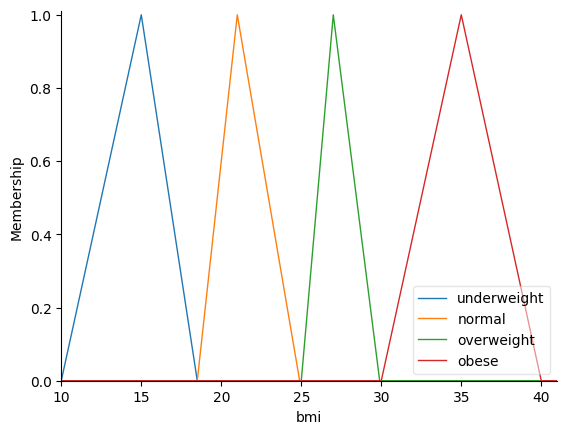

In [19]:
bmi.view()

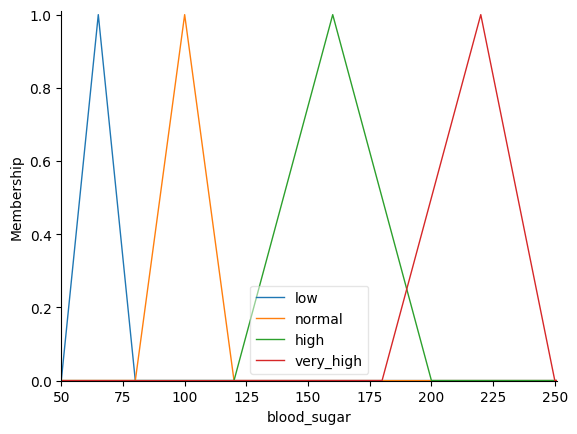

In [20]:
blood_sugar.view()

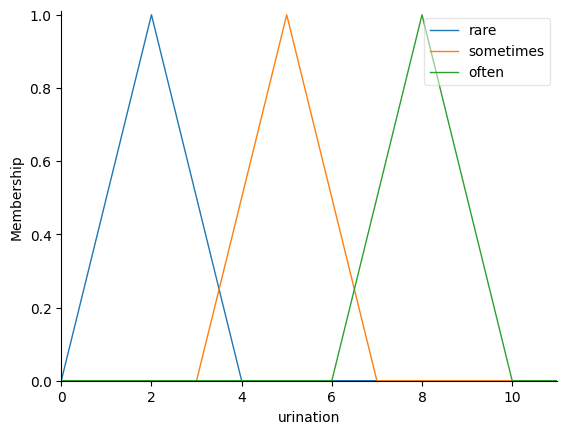

In [21]:
urination.view()

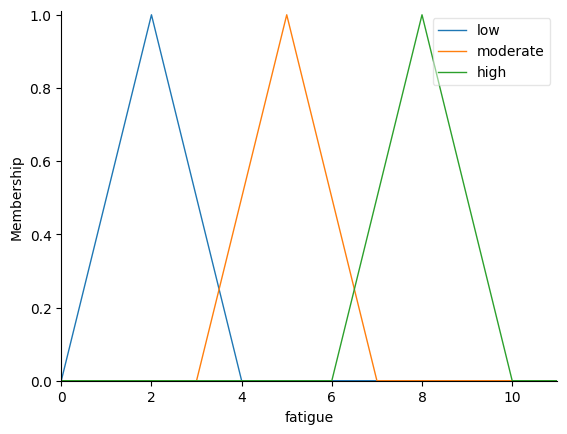

In [22]:
fatigue.view()

Nguy cơ tiểu đường: 65.00
Nguy cơ tiểu đường CAO. Cần xét nghiệm y tế thêm.


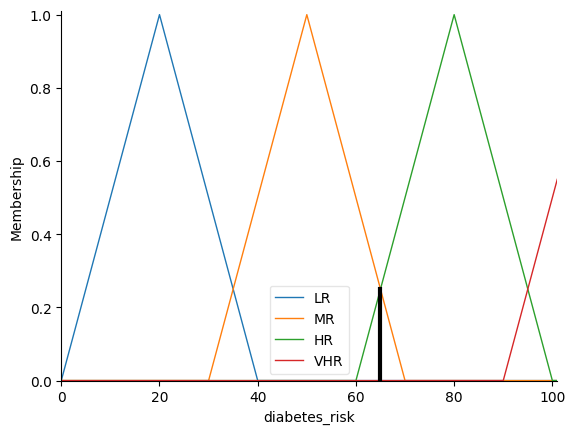

In [23]:
# Tính toán kết quả

simulation.compute() # Changed from diabetes_risk_sim.compute() to simulation.compute()
result = simulation.output['diabetes_risk']
print(f"Nguy cơ tiểu đường: {result:.2f}")

# Xuất câu trả lời theo mức độ nguy cơ
if result < 30:
    print("Nguy cơ tiểu đường THẤP. Không đáng lo ngại ngay lập tức.")
elif result < 60:
    print("Nguy cơ tiểu đường TRUNG BÌNH. Đề xuất thay đổi lối sống.")
elif result < 80:
    print("Nguy cơ tiểu đường CAO. Cần xét nghiệm y tế thêm.")
else:
    print("Nguy cơ tiểu đường RẤT CAO. Cần chăm sóc y tế khẩn cấp.")

diabetes_risk.view(simulation)